In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('final_df.csv')
df = df.drop(['Dates', 'Year','ADV','NOUN','VERB','word_freq_rate_Nsw','Noun_rate','F_K_R','PRON', 'NOUN_Ratio' , 'PRP_Ratio' , 'TTR'], axis=1)
f_list = df.values.tolist()

In [3]:
import math
def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)



In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
i = 0
while i <= 96:
    v1 = f_list[i]
    v2 = f_list[i+1]
    print(cosine_similarity(v1,v2))
    i += 1


0.9773384594607692
0.9919615411295409
0.9856357900626818
0.9638013542197942
0.9441886061482302
0.9673407465713548
0.9956157156699775
0.9617432430858573
0.9897047139519031
0.9966645807210172
0.9871420762910896
0.9795234967120079
0.9974326899938879
0.9934190571317849
0.9945801502349811
0.991249192696417
0.975968246568602
0.9486105069513693
0.9979151163723882
0.9932578068360398
0.9504025763675336
0.9853928645073519
0.9909690938160405
0.9637384672711566
0.9751116708522142
0.9879651163591838
0.9765003682766225
0.9817473032903486
0.9153134338911938
0.9644547279766693
0.985108371923529
0.9824214410486729
0.9861730184783741
0.9299774377855311
0.989311379948679
0.9940225686883319
0.993149693350514
0.9582504153168777
0.9619471576298824
0.9359354118484107
0.9628063236056469
0.9738794169379016
0.9293573647902473
0.984057829291704
0.8742200825631683
0.9690471033665342
0.9707959151692594
0.9686262800490233
0.981677101964106
0.9426437690961331
0.9945550711052078
0.9840649047396014
0.9866526100313991


In [13]:
# from scipy import spatial
# dataSetI = f_list[96]
# dataSetII = f_list[97]
# result = 1 - spatial.distance.cosine(dataSetI, dataSetII) 
# result
# len(f_list)

In [19]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
dt = pd.read_csv("heihei.csv")
dt.head()

,Dates,Year,ADV,NOUN,VERB,PRON,PRP_NOUN_Ratio,NOUN_Ratio,PRP_Ratio,word_freq_rate,...,Noun_rate,PRON_rate,ADV_rate,H_S,BM,TTR,SICH,A_R_I,F_K_R,Cos
0,1980/7/17,1980,205,890,626,256,28.764045,18.847946,5.421432,4.235493,...,1.948327,4.320203,0.677679,28.961185,14.263374,23.634053,12.992832,10,11,0.977338
1,1980/8/18,1980,114,473,333,189,39.957717,17.669033,7.060142,1.456855,...,0.485618,5.117669,0.000000,25.454191,15.407202,23.010833,14.448052,9,10,0.991962
2,1980/9/21,1980,212,746,499,259,34.718499,19.366563,6.723780,4.569055,...,3.634476,5.399792,0.337487,22.607381,15.921747,19.548287,17.662683,9,10,0.985636
3,1980/10/19,1980,180,753,465,235,31.208499,19.826224,6.187467,3.817799,...,3.765140,5.660874,0.342285,28.946711,14.788018,23.117430,14.009112,8,9,0.963801
4,1980/10/28,1980,108,787,434,144,18.297332,21.374253,3.910918,5.404671,...,1.928300,2.878870,0.000000,30.511771,13.786073,27.349267,14.001986,10,11,0.944189


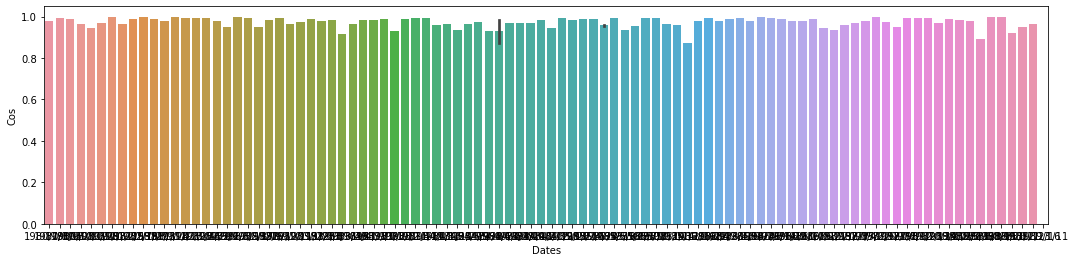

In [21]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Dates', y='Cos', data=dt)

In [28]:
import numpy as np
import pandas as pd


def Pettitt_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    n         = inputdata.shape[0]
    k = range(n)
    inputdataT = pd.Series(inputdata)
    r = inputdataT.rank()
    Uk = [2*np.sum(r[0:x])-x*(n + 1) for x in k]
    Uka = list(np.abs(Uk))
    U = np.max(Uka)
    K = Uka.index(U)
    pvalue         = 2 * np.exp((-6 * (U**2))/(n**3 + n**2))
    if pvalue <= 0.05:
        change_point_desc = '显著'
    else:
        change_point_desc = '不显著'
    #Pettitt_result = {'突变点位置':K,'突变程度':change_point_desc}
    return K #,Pettitt_result



Exception: Data must be 1-dimensional

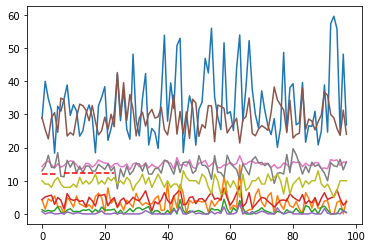

In [30]:
dt = f_list
plt.plot(dt)
plt.plot([0,5],[np.mean(dt[0:6]),np.mean(dt[0:6])],'m--',color='r')
plt.plot([7,23],[np.mean(dt[7:]),np.mean(dt[7:])],'m--',color='r')
#print("Mann-Kendall:",Kendall_change_point_detection(dt))
print("Pettitt:",Pettitt_change_point_detection(dt))
#print("Buishand U Test:",Buishand_U_change_point_detection(dt))
#print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(dt))

